In [1]:
#извлекаем данные из сохраненного файла
import pickle
with open('data.pickle', 'rb') as f:
    dict_abs_freq = pickle.load(f)
#dict_abs_freq - массив словарей абсолютной встречаемости слов в разных книгах

In [2]:
#Сделаем еще один словарь - встречаемость слов во всей серии книг

In [3]:
def sum_two_dicts(dict1, dict2):
    new_dict = {}
    all_keys = list(set(list(dict1.keys()) + list(dict2.keys())))
    for key in all_keys:
        if key in dict1.keys() and key in dict2.keys():
            new_dict[key] = dict1[key] + dict2[key]
        elif (key in dict1.keys()):
            new_dict[key] = dict1[key]
        else:
            new_dict[key] = dict2[key]
    return new_dict


In [4]:
dict_all_book = {}
for cur_dict in dict_abs_freq:
    dict_all_book = sum_two_dicts(dict_all_book, cur_dict)

In [5]:
# Добавим словарь встречаемости слов к словарям встречаемости слов в каждой отдельной книге
dict_abs_freq.append(dict_all_book)

In [6]:
#определяем количество слов для каждой книги
lens = []
for cur_dict in dict_abs_freq:
    cur_len = 0
    for (key, value) in cur_dict.items():
        cur_len += value
    lens.append(cur_len)

In [7]:
print("Количество слов")
for i in range(len(lens) - 1):
    print("Книга " + str(i + 1) + "  -  " + str(lens[i]))
print("Всего " + "  -  " + str(lens[7]))

Количество слов
Книга 1  -  83113
Книга 2  -  71217
Книга 3  -  85337
Книга 4  -  149724
Книга 5  -  210942
Книга 6  -  148428
Книга 7  -  167783
Всего   -  916544


In [ ]:
Книги разной длины, поэтому важно не только,сколько раз слово встречается в книге(абсолютная встречаемость),
но и соотношение встречаемости слова к общему количеству слов(относительная встречаемость).
Будем хранить в словаре в качестве значения для каждого слова - кортеж, состоящий из абсолютной и относительной встречаемости

In [8]:
itog_dict = []
for i in range(len(dict_abs_freq)):
    new_dict = {}
    cur_dict = dict_abs_freq[i]
    cur_len = lens[i]
    for (key, value) in cur_dict.items():
        new_dict[key] = (value, value / cur_len)
    itog_dict.append(new_dict)

In [9]:
itog_dict[0] #словарь для первой книги

{'здешний': (2, 2.4063624222444144e-05),
 'просторный': (1, 1.2031812111222072e-05),
 'вспышка': (6, 7.219087266733242e-05),
 'расхохотаться': (6, 7.219087266733242e-05),
 'заикание': (2, 2.4063624222444144e-05),
 'метла': (106, 0.0012753720837895396),
 'деталь': (1, 1.2031812111222072e-05),
 'баруффио': (1, 1.2031812111222072e-05),
 'уйти': (36, 0.0004331452360039946),
 'жарко': (2, 2.4063624222444144e-05),
 'коряга': (1, 1.2031812111222072e-05),
 'фыркнуть': (3, 3.609543633366621e-05),
 'горелый': (1, 1.2031812111222072e-05),
 'пробить': (2, 2.4063624222444144e-05),
 'судейство': (1, 1.2031812111222072e-05),
 'беседовать': (2, 2.4063624222444144e-05),
 'полярный': (2, 2.4063624222444144e-05),
 'вопить': (5, 6.0159060556110356e-05),
 'послепослезавтра': (1, 1.2031812111222072e-05),
 'побаиваться': (1, 1.2031812111222072e-05),
 'простыня': (3, 3.609543633366621e-05),
 'барабанить': (2, 2.4063624222444144e-05),
 'пялиться': (1, 1.2031812111222072e-05),
 'случиться-то': (1, 1.20318121112

In [12]:
Напишем функцию для печати отсортированных словарей встречаемости

SyntaxError: invalid syntax (<ipython-input-12-00258288756a>, line 1)

In [10]:
def fun(x): # вспомогательная функция для сортировки
    return -x[1][0], x[0]
# функция для печати отсортированных словарей встречаемости
def print_sorted(cur_dict, is_rel = False, min_abs_freq = 0, min_rel_freq = 0):
# по умолчанию условие ставится на абсолютную встречаемость слова, а не на относительную
# min_abs_freq - минимальная абсолютная встречаемость
# min_rel_freq - минимальная относительная встречаемость
    if (not is_rel): # смотрим на абсолютную встречаемость
        for (key, value) in sorted(cur_dict.items(), key = fun):
            if (value[0] >= min_abs_freq):
                print(key, value[0])
    else:
        for (key, value) in sorted(cur_dict.items(), key = fun):
            if (value[1] >= min_rel_freq):
                print(key, "%.4f" %value[1])

In [11]:
# посмотрим, какие слова встречаются с частотой не менее 1000 слов на книгу

for i in range(len(itog_dict) - 1):
    print("Книга " + str(i + 1) + "\n")
    print_sorted(itog_dict[i], min_abs_freq = 1000)
    print("----------------------")

Книга 1

он 2753
и 2672
в 2098
не 1806
что 1701
гарри 1646
на 1321
быть 1234
я 1094
----------------------
Книга 2

и 2161
в 1881
он 1786
гарри 1589
не 1408
на 1312
----------------------
Книга 3

и 2761
он 2288
в 2232
гарри 1919
не 1755
на 1586
что 1165
с 1124
я 1076
----------------------
Книга 4

и 5094
он 4141
в 3785
гарри 2962
не 2878
на 2788
с 2110
что 2080
я 1763
быть 1564
весь 1227
они 1209
это 1166
как 1121
она 1120
ты 1057
к 1000
----------------------
Книга 5

он 6639
и 6557
в 4830
не 4323
гарри 3899
на 3834
что 3496
с 2874
я 2483
быть 2330
она 2233
сказать 2011
они 1836
ты 1762
это 1731
как 1500
к 1384
весь 1380
но 1334
у 1299
рон 1237
гермиона 1230
а 1116
вы 1086
за 1027
по 1021
----------------------
Книга 6

он 4439
и 4423
в 3641
не 3316
гарри 2910
что 2485
на 2307
я 2293
с 2129
быть 1550
это 1334
ты 1254
сказать 1208
она 1186
как 1154
весь 1055
----------------------
Книга 7

и 5467
он 5235
в 4076
гарри 3474
не 3406
на 2838
что 2640
я 2127
с 2073
быть 1687
она 1663
они 

In [12]:
# посмотрим, какие слова встречаются с частотой не менее 1 %

for i in range(len(itog_dict) - 1):
    print("Книга " + str(i + 1) + "\n")
    print_sorted(itog_dict[i], is_rel = True, min_rel_freq = 0.01)
    print("----------------------")
print("Все книги " + "\n")
print_sorted(itog_dict[7], is_rel = True, min_rel_freq = 0.01)

Книга 1

он 0.0331
и 0.0321
в 0.0252
не 0.0217
что 0.0205
гарри 0.0198
на 0.0159
быть 0.0148
я 0.0132
с 0.0116
они 0.0104
----------------------
Книга 2

и 0.0303
в 0.0264
он 0.0251
гарри 0.0223
не 0.0198
на 0.0184
с 0.0134
что 0.0125
я 0.0118
быть 0.0101
----------------------
Книга 3

и 0.0324
он 0.0268
в 0.0262
гарри 0.0225
не 0.0206
на 0.0186
что 0.0137
с 0.0132
я 0.0126
быть 0.0106
----------------------
Книга 4

и 0.0340
он 0.0277
в 0.0253
гарри 0.0198
не 0.0192
на 0.0186
с 0.0141
что 0.0139
я 0.0118
быть 0.0104
----------------------
Книга 5

он 0.0315
и 0.0311
в 0.0229
не 0.0205
гарри 0.0185
на 0.0182
что 0.0166
с 0.0136
я 0.0118
быть 0.0110
она 0.0106
----------------------
Книга 6

он 0.0299
и 0.0298
в 0.0245
не 0.0223
гарри 0.0196
что 0.0167
на 0.0155
я 0.0154
с 0.0143
быть 0.0104
----------------------
Книга 7

и 0.0326
он 0.0312
в 0.0243
гарри 0.0207
не 0.0203
на 0.0169
что 0.0157
я 0.0127
с 0.0124
быть 0.0101
----------------------
Все книги 

и 0.0318
он 0.0298
в 0.0246


In [22]:
Среди слов с частотой больше 1% есть только одно значимое слово - Гарри

True

In [ ]:
Будем рассматривать книги по очереди, удалять в них редкие слова и короткие слова
(кроме частых и коротких слов - Рон, Том и тп).
Короткие слова редко являются значимыми(обычно это слова он, и, в, не)
Имена нужно начинать с заглавной буквы
Морфологический анализатор некоторые слова неверно ставит в начальную форму:
снегга - Снегг, флера - Флер, уизлить - Уизли, малфа/малфой - Малфой и тп
Будем их заменять
Получим short_dict - словарь без редких слов, без коротких слов и без глаголов, союзов, предлогов, частиц, междометий

In [13]:
#подключаем морфологический анализатор
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [14]:
#обработка слова, у которого анализатор нашел две начальные формы
#альбусы, альбуса - альбус, малфой, малфа - малфой
def insert_amb_words(key1, key2, new_key, len_book, freq, old_dict, new_dict):
    if (key1 in old_dict.keys() and key2 in old_dict.keys()):
        value1 = old_dict[key1]
        value2 = old_dict[key2]
        if ((value1[0] + value2[0]) / len_book > freq):
            new_dict[new_key] = ((value1[0] + value2[0], (value1[0] + value2[0]) / len_book))
    elif (key1 in old_dict.keys() and old_dict[key1][0] / len_book > freq):
        new_dict[new_key] = (old_dict[key1], old_dict[key1][0] / len_book)
    elif (key2 in old_dict.keys() and old_dict[key2][0] / len_book > freq):
        new_dict[new_key] = (old_dict[key2], old_dict[key2][0] / len_book)
            
            

def delete_bad_words(cur_dict, len_book, param_freq = 0.001):
    shortd = {}
    dict_replace = {'дамблдора':'дамблдор', 'флера':'флер', 'крестража':'крестраж', 'снегга':'снегг', 'уизлить':'уизли', 'джинний':'джинни', 'северусый':'северус', 'невилла':'невилл', 'квиррелла':'квиррелл', 'вернона':'вернон', 'миртлый':'миртл','краучий':'крауч', 'бэгмена':'бэгмен', 'винк':'винки'}
    #names_big_letter = ['вернон', 'дадли': 'Дадли', 'дурсль', , 'макгонагалл', 'невилла':'Невилл', 'поттер', 'хагрид']
    ambiguous_words = ['альбуса', 'альбусы', 'малфа', 'малфой', 'невилл', 'невилла']
    for (key, value) in cur_dict.items():
        rel_freq = value[1]
        if (rel_freq > param_freq and (len(key) > 4 or (len(key) == 4 and rel_freq > param_freq) or key == 'том' or key == 'рон')):
                if key in dict_replace.keys():
                    key = dict_replace[key] #сначала меняем на правильный вариант
                    # иначе уизлить(Уизли) будет удален, как глагол
                if not key in ambiguous_words:
                    tag = morph.parse(key)[0].tag
                    if not (('INFN' in tag) or ('PREP' in tag) or ('CONJ' in tag) or ('PRCL' in tag) or ('INTJ' in tag) or ('NPRO' in tag)):
                        shortd[key] = value
    insert_amb_words('альбуса', 'альбусы', 'альбус', len_book, param_freq, cur_dict, shortd)
    insert_amb_words('малфой', 'малфа', 'малфой', len_book, param_freq, cur_dict, shortd)
    insert_amb_words('невилл', 'невилла', 'невилл', len_book, param_freq, cur_dict, shortd)

    #insert_amb_words(cur_dict['малфой'], cur_dict['малфа'], 'малфой', len_book, param_freq, shortd)

    #shortd[''] = union_amb_words(cur_dict[''], cur_dict[''], len_book)
    return shortd

In [15]:
short_itog_dict = [] # массив со словарями встречаемости слов в разных книгах
for i in range(len(itog_dict)):
    t = delete_bad_words(itog_dict[i], lens[i], param_freq = 0.001)
    short_itog_dict.append(t)

In [16]:
print_sorted(short_itog_dict[7])

гарри 18399
весь 6952
рон 6170
гермиона 5333
мочь 3436
который 3246
дамблдор 2962
свой 2915
один 2792
рука 2416
этот 2293
глаз 2210
такой 2056
палочка 1925
хагрид 1920
профессор 1875
большой 1722
лицо 1617
уизли 1606
снегг 1585
дверь 1564
самый 1554
голос 1521
друг 1425
очень 1402
время 1322
малфой 1302
голова 1276
волшебный 1257
теперь 1237
снова 1234
волан-де-морт 1200
поттер 1195
мистер 1185
другой 1141
сириус 1077
человек 1059
стол 1046
хороший 990
здесь 988
взгляд 973
сейчас 959
слово 951
несколько 947
дело 942
нога 942


In [67]:
short_itog_dict[4]

{'амбридж': (548, 0.0025978705046884928),
 'большой': (403, 0.001910477761659603),
 'весь': (1380, 0.006542082657792189),
 'взгляд': (275, 0.001303675891951342),
 'волан-де-морт': (212, 0.0010050155967043074),
 'волшебный': (219, 0.001038200073953978),
 'время': (339, 0.0016070768268054726),
 'гарри': (3899, 0.018483753828066482),
 'гермиона': (1230, 0.005830986716727821),
 'глаз': (499, 0.002365579163940799),
 'голова': (315, 0.0014933014762351737),
 'голос': (395, 0.0018725526448028368),
 'дамблдор': (555, 0.002631054981938163),
 'дверь': (465, 0.002204397417299542),
 'дело': (224, 0.0010619032719894569),
 'джинни': (225, 0.0010666439115965525),
 'джордж': (272, 0.0012894539731300547),
 'должный': (234, 0.0011093096680604147),
 'другой': (267, 0.0012657507750945757),
 'какой': (221, 0.0010476813531681694),
 'который': (804, 0.0038114742441050144),
 'лицо': (400, 0.0018962558428383158),
 'миссис': (257, 0.001218344379023618),
 'мистер': (221, 0.0010476813531681694),
 'мочь': (793, 0.0

In [18]:
abs_dicts = [] # словари абсолютной встречаемости слов
rel_dicts = [] # словари относительной встречаемости слов
for cur_dict in short_itog_dict:
    new_abs = {}
    new_rel = {}
    for (key, value) in cur_dict.items():
        new_abs[key] = value[0]
        new_rel[key] = value[1]
    abs_dicts.append(new_abs)
    rel_dicts.append(new_rel)


In [ ]:
Построим диаграммы зависимостей встречаемости слов и номеров книги

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
df = pd.DataFrame(rel_dicts, index = ['1', '2', '3', '4', '5', '6', '7', 'всего'])

In [23]:
df = df.replace(np.nan, 0)

In [24]:
df

,амбридж,блэк,большой,бэгмен,вдруг,вернон,весь,взгляд,винки,волан-де-морт,...,тёмный,уизли,урок,фред,хагрид,хвост,хороший,человек,школа,этот
1,0.000000,0.000000,0.001660,0.000000,0.000000,0.001612,0.008434,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005053,0.000000,0.001323,0.001275,0.001624,0.002791
2,0.000000,0.000000,0.001868,0.000000,0.001151,0.000000,0.007933,0.001208,0.000000,0.000000,...,0.000000,0.002443,0.000000,0.001165,0.002190,0.000000,0.001194,0.000000,0.002022,0.002696
3,0.000000,0.003551,0.001851,0.000000,0.001055,0.000000,0.008988,0.001078,0.000000,0.000000,...,0.000000,0.001277,0.001102,0.000000,0.002543,0.000000,0.001172,0.000000,0.001008,0.002203
4,0.000000,0.000000,0.001917,0.001376,0.000000,0.000000,0.008195,0.001075,0.001015,0.001469,...,0.000000,0.002665,0.000000,0.001142,0.002237,0.001055,0.001115,0.001142,0.000000,0.002151
5,0.002598,0.000000,0.001910,0.000000,0.000000,0.000000,0.006542,0.001304,0.000000,0.001005,...,0.000000,0.002133,0.000000,0.001489,0.001887,0.000000,0.000000,0.001090,0.000000,0.002394
6,0.000000,0.000000,0.002062,0.000000,0.000000,0.000000,0.007108,0.000000,0.000000,0.001603,...,0.001085,0.001489,0.000000,0.000000,0.001516,0.000000,0.001112,0.001347,0.001051,0.002688
7,0.000000,0.000000,0.001770,0.000000,0.000000,0.000000,0.007492,0.000000,0.000000,0.002557,...,0.001007,0.001174,0.000000,0.000000,0.001007,0.000000,0.000000,0.001335,0.000000,0.002712
всего,0.000000,0.000000,0.001879,0.000000,0.000000,0.000000,0.007585,0.001062,0.000000,0.001309,...,0.000000,0.001752,0.000000,0.000000,0.002095,0.000000,0.001080,0.001155,0.000000,0.002502


In [30]:
names_pers = ['амбридж', 'блэк', 'бэгмен', 'вернон', 'винки', 'волан-де-морт', 'гарри', 'гермиона', 'грюм', 'дадли', 'дамблдор', 'джинни', 'джордж', 'добби', 'дурсль', 'квиррелл', 'короста', 'крам', 'крауч', 'локонс', 'люпин', 'макгонагалл', 'малфой', 'миртл', 'невилл', 'поттер', 'реддл', 'рон', 'седрик', 'сириус', 'слизерин', 'слизнорт', 'снегг', 'уизли', 'фред', 'хагрид']
pers = pd.DataFrame(index = ['1', '2', '3', '4', '5', '6', '7', 'всего'])
for cur_pers in names_pers:
    pers[cur_pers] = df[cur_pers]
names_items = ['большой', 'взгляд', 'волшебник', 'волшебный', 'время', 'глаз', 'голова', 'голос', 'дверь', 'дело', 'дементор', 'день', 'дневник', 'друг', 'дядя', 'замок', 'камень', 'комната', 'кубок', 'лицо', 'метла', 'миссис', 'мистер', 'нога', 'один', 'палочка', 'письмо', 'пожиратель', 'профессор', 'рука', 'слово', 'смерть', 'стол', 'тёмный', 'урок', 'хороший', 'человек', 'школа']
items = pd.DataFrame(index = ['1', '2', '3', '4', '5', '6', '7', 'всего'])
for cur_it in names_items:
    items[cur_it] = df[cur_it]

In [33]:
#Диаграммы встречаемости одного персонажа в разных книгах

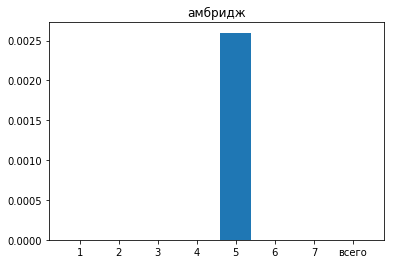

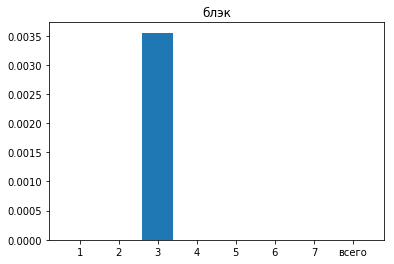

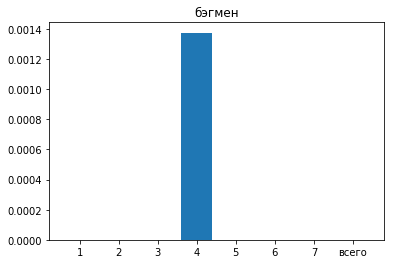

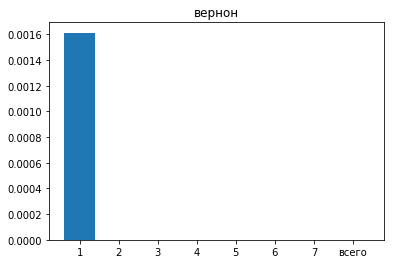

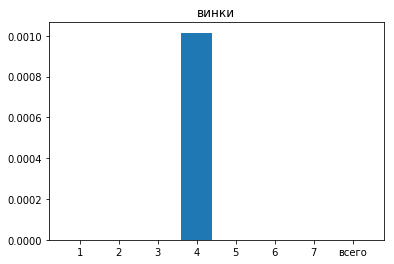

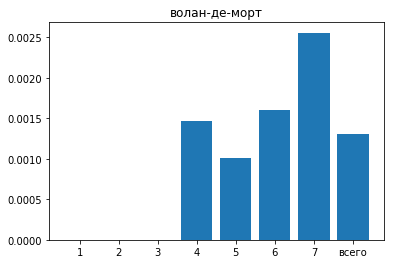

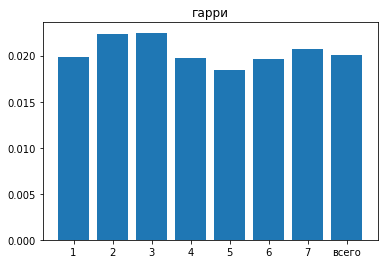

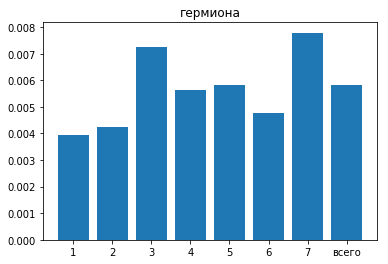

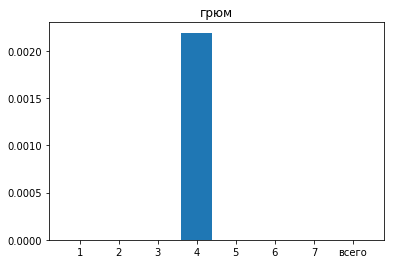

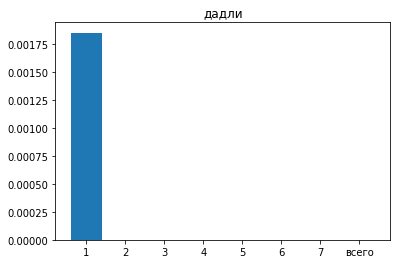

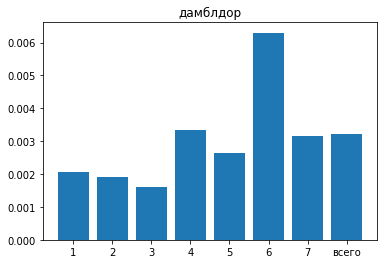

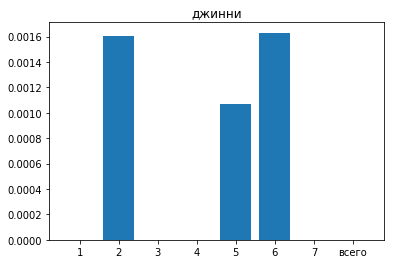

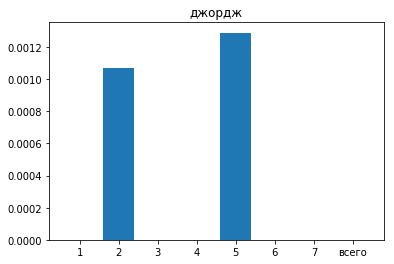

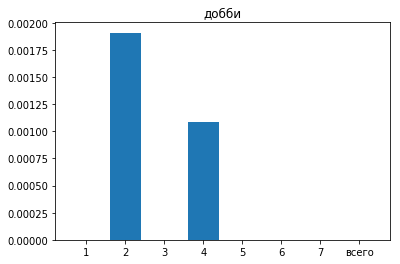

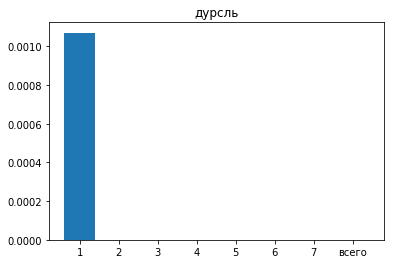

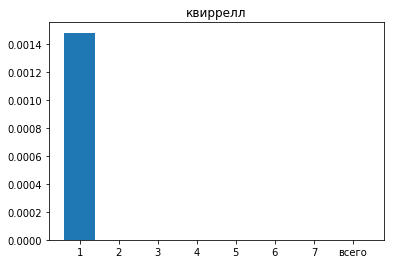

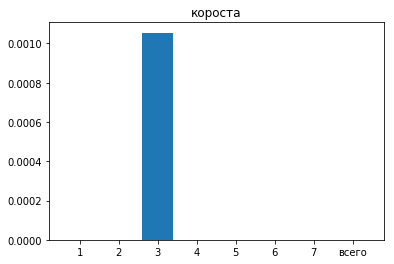

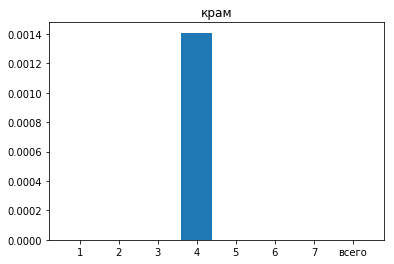

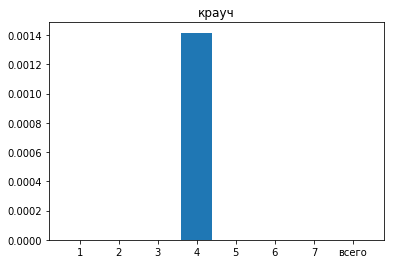

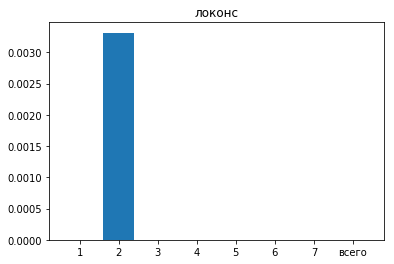

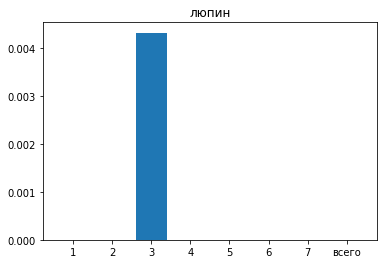

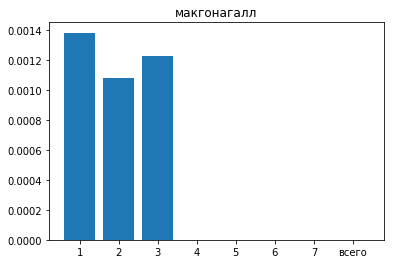

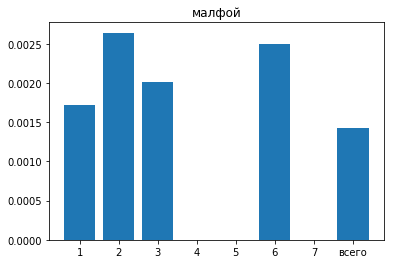

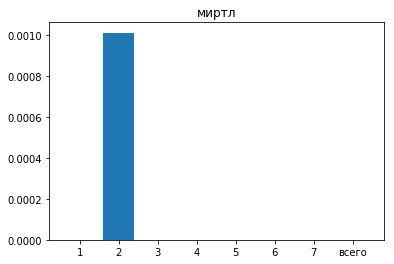

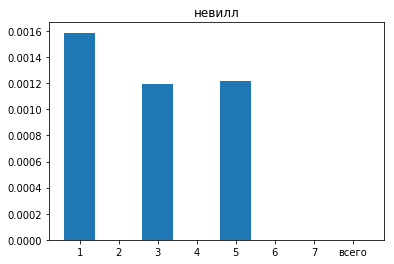

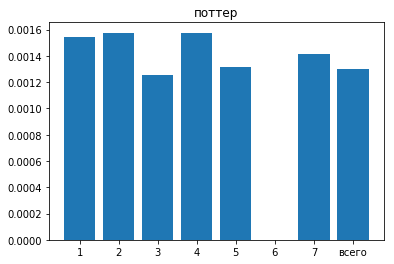

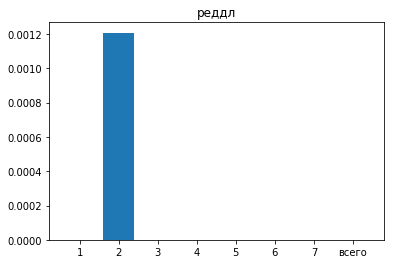

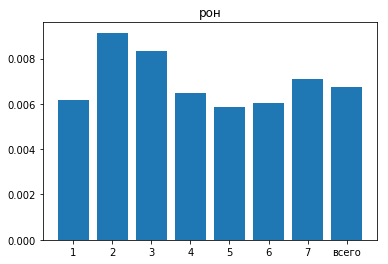

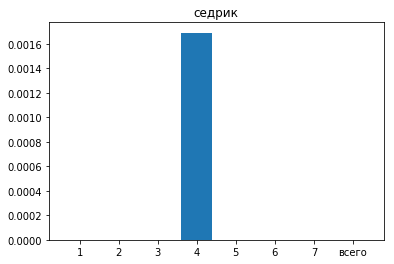

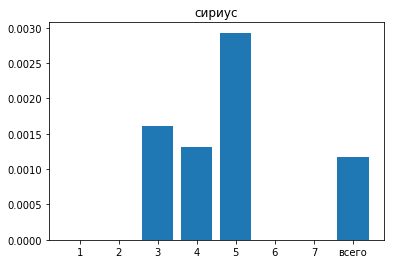

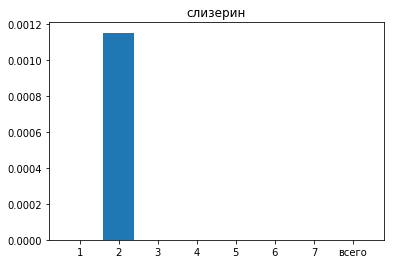

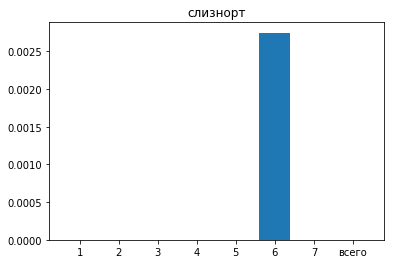

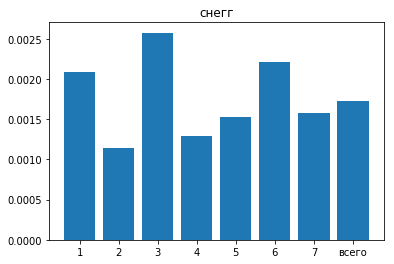

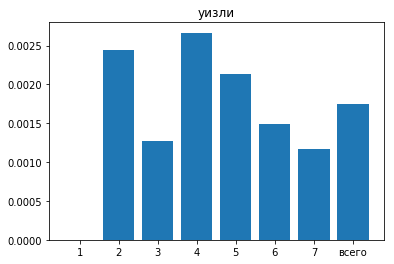

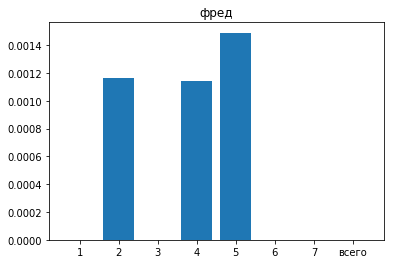

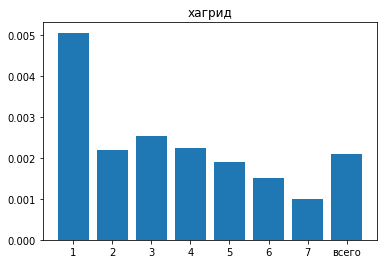

In [34]:
#персонажи
for cur_name in pers.columns:
    plt.bar(pers[cur_name].index, pers[cur_name])
    plt.title(cur_name)
    plt.show()

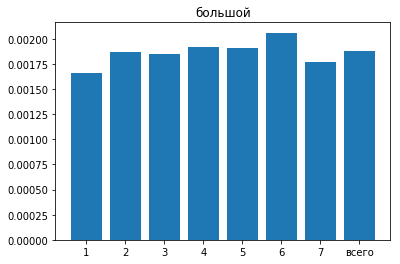

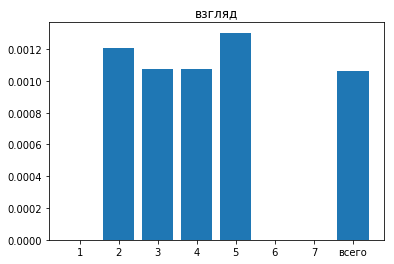

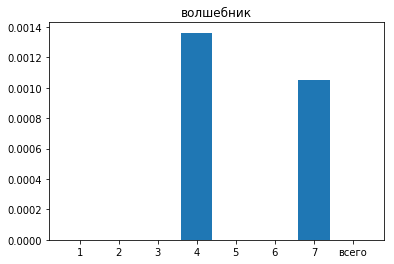

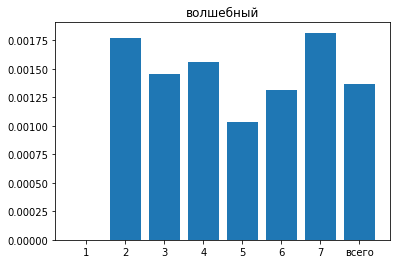

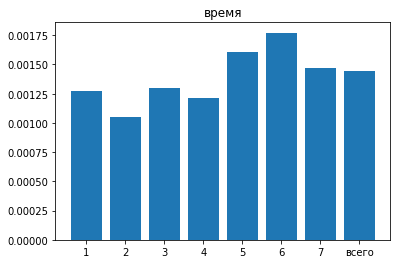

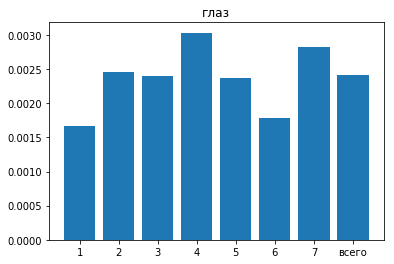

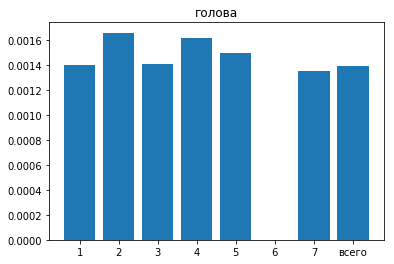

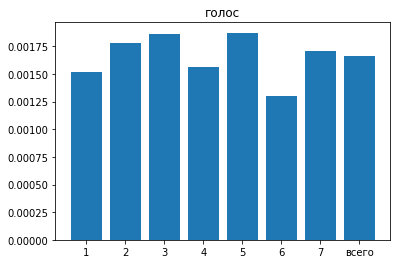

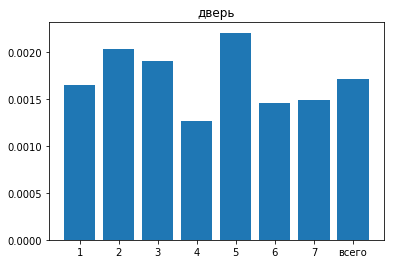

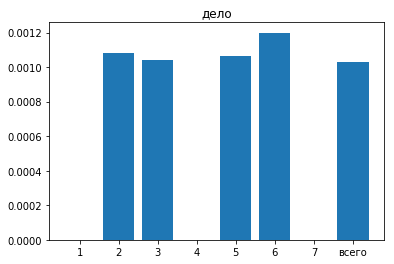

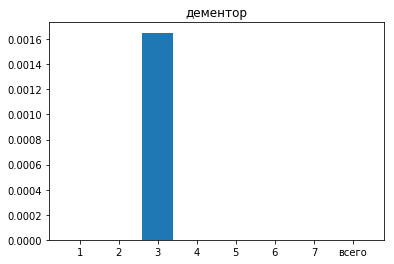

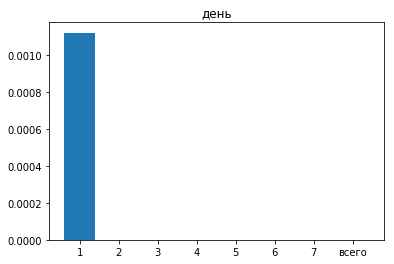

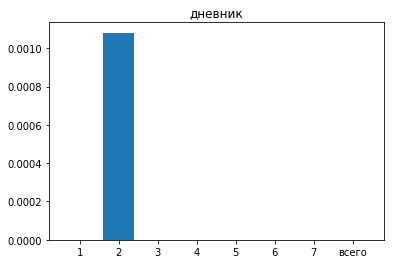

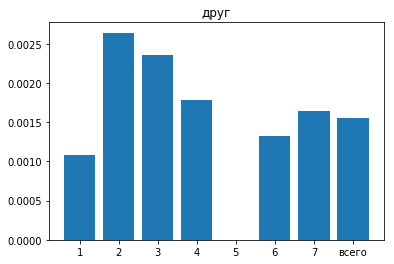

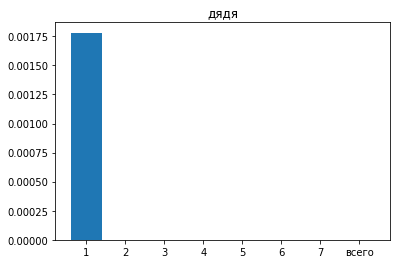

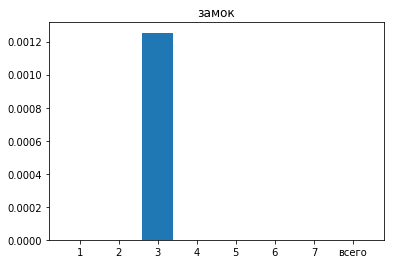

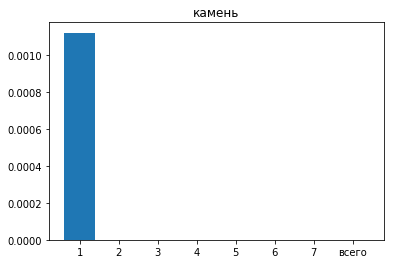

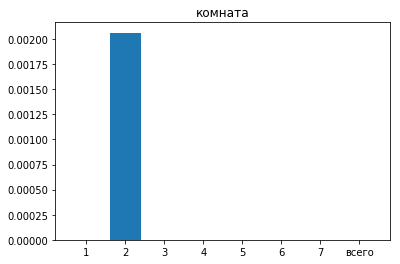

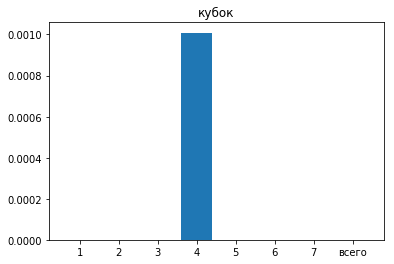

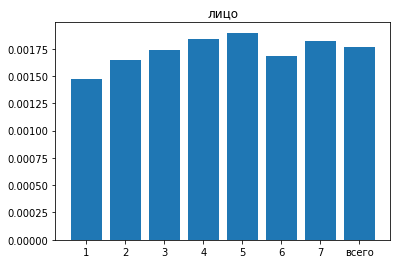

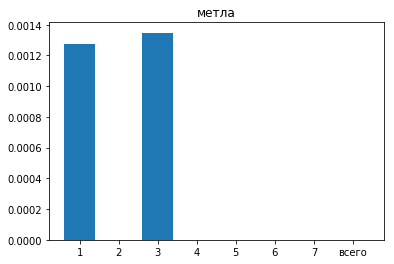

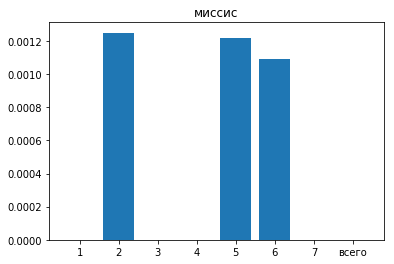

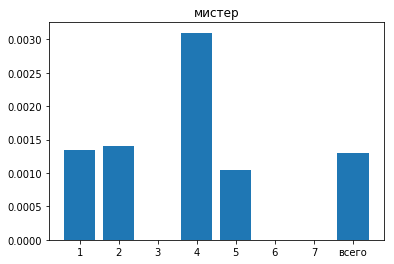

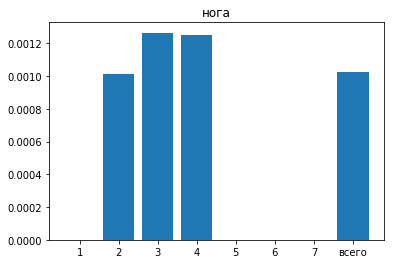

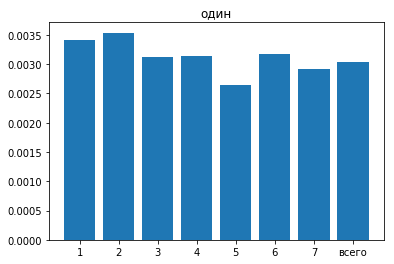

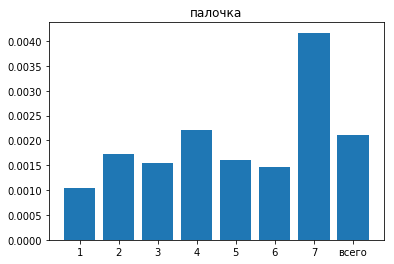

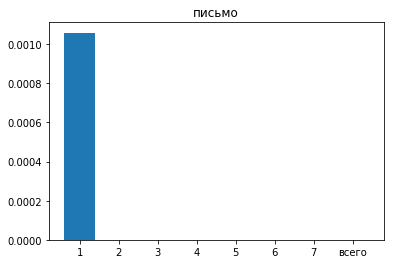

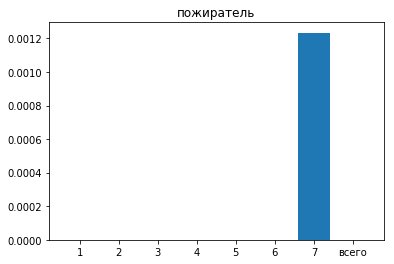

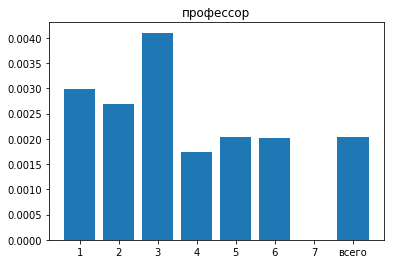

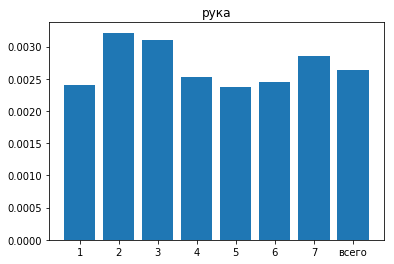

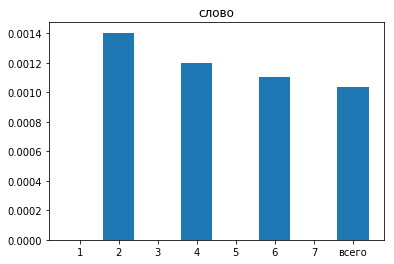

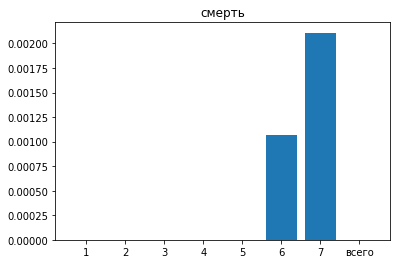

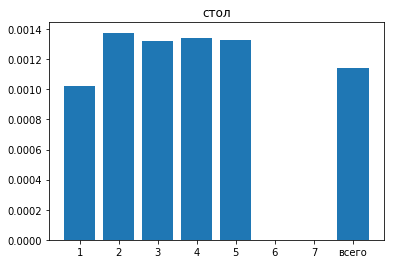

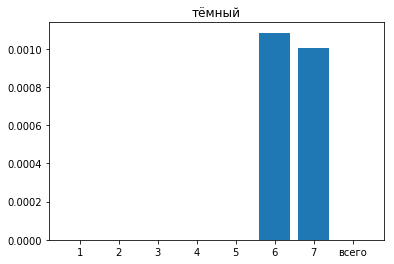

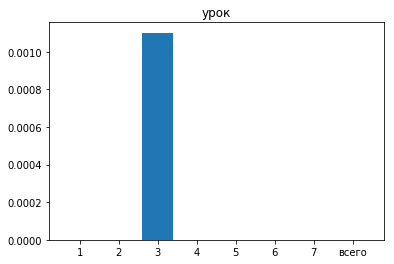

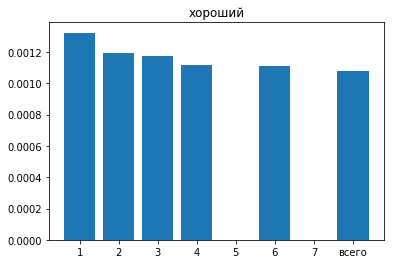

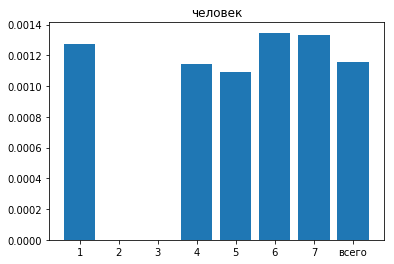

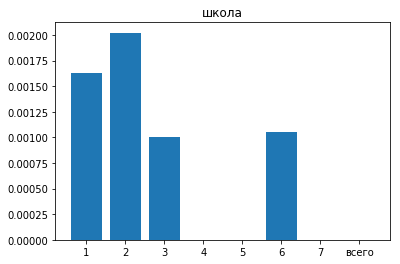

In [32]:
# предметы
for cur_name in items.columns:
    plt.bar(items[cur_name].index, items[cur_name])
    plt.title(cur_name)
    plt.show()

In [ ]:
#Статистика встречаемости разных персонажей в одной книге 

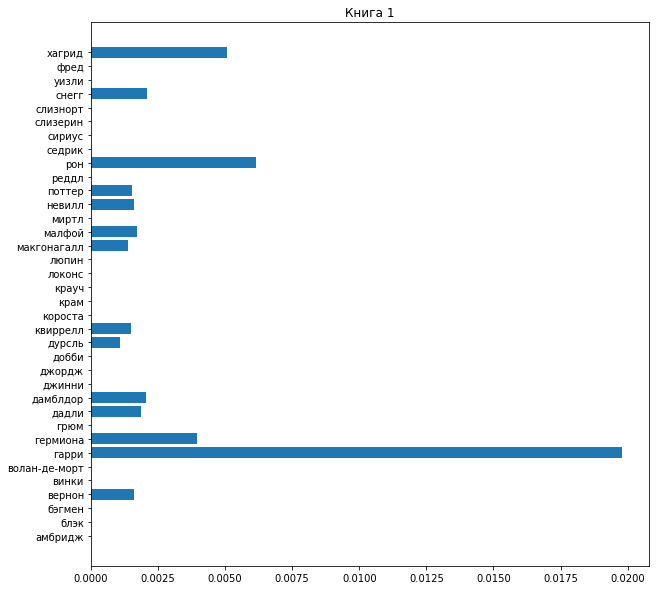

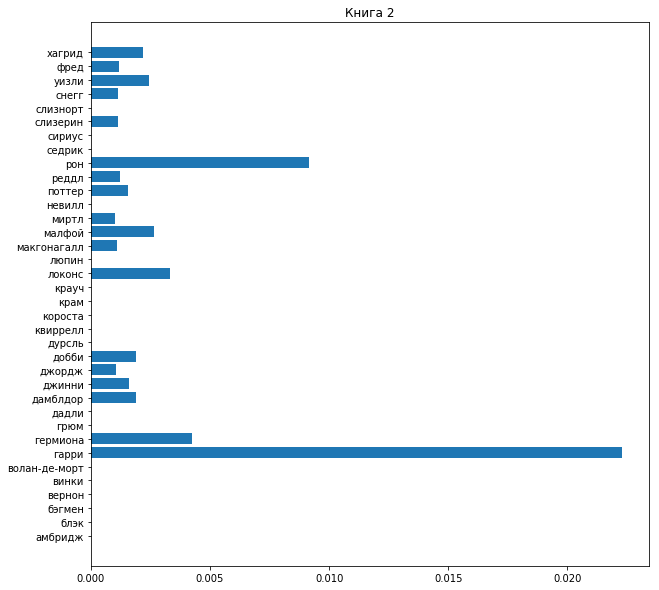

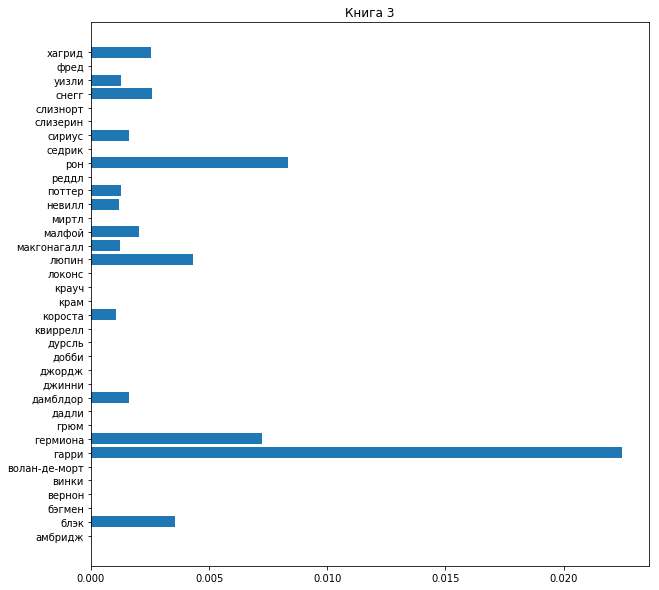

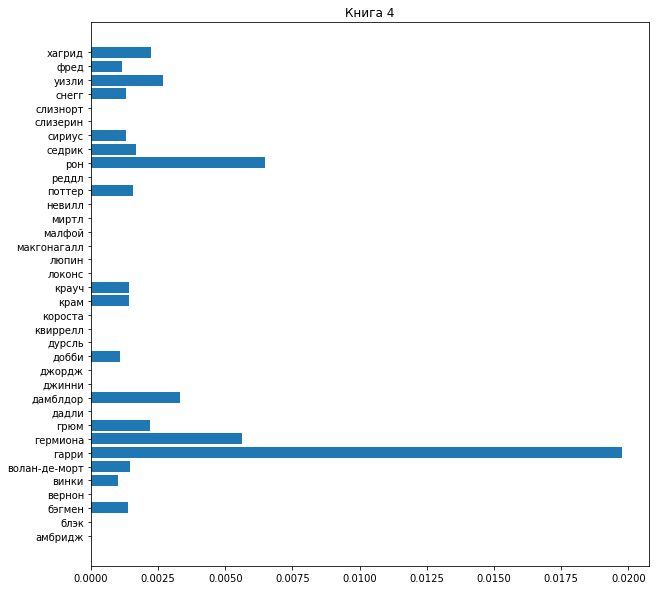

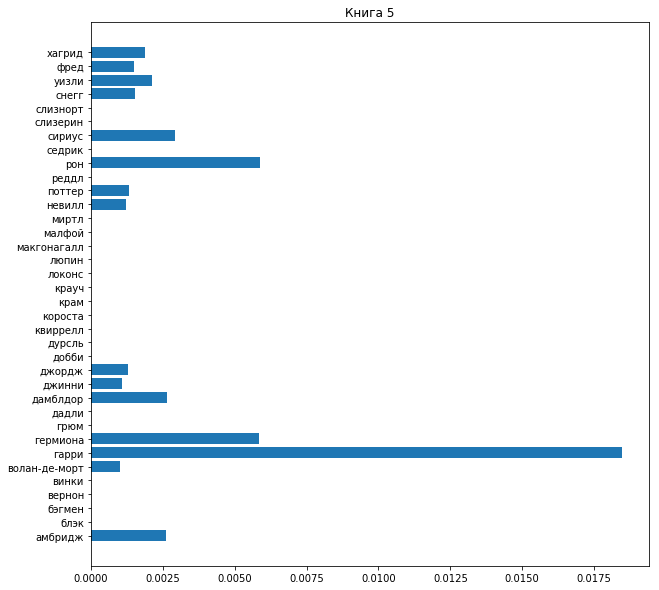

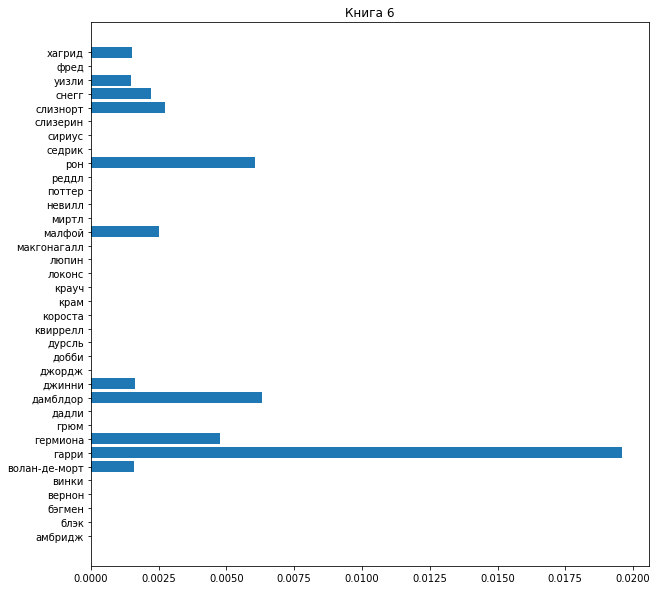

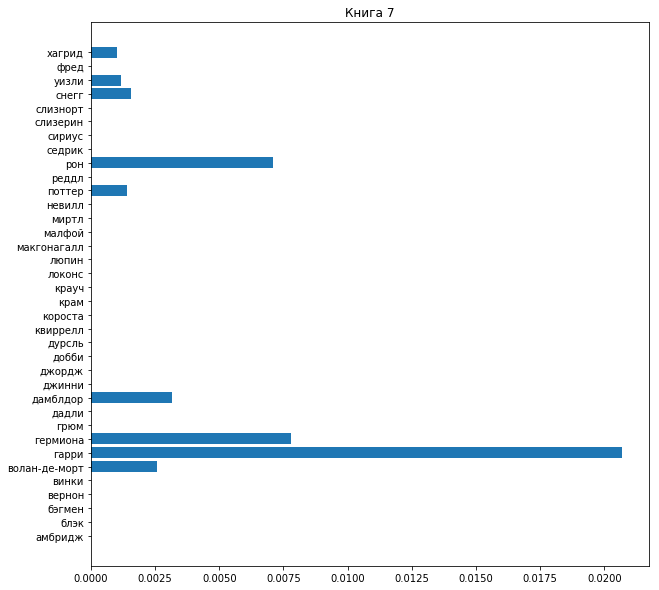

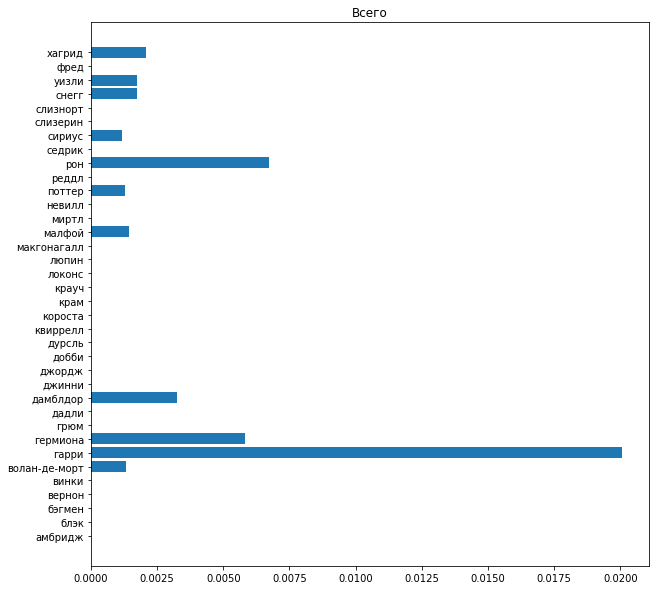

In [35]:
#персонажи
for i in range(len(pers) - 1):
    plt.figure(figsize=(10,10))
    plt.barh(pers.columns, pers.iloc[i])
    plt.title('Книга ' + str(i + 1))
    plt.show()
plt.figure(figsize=(10,10))
plt.barh(pers.columns, pers.iloc[7])
plt.title('Всего')
plt.show()

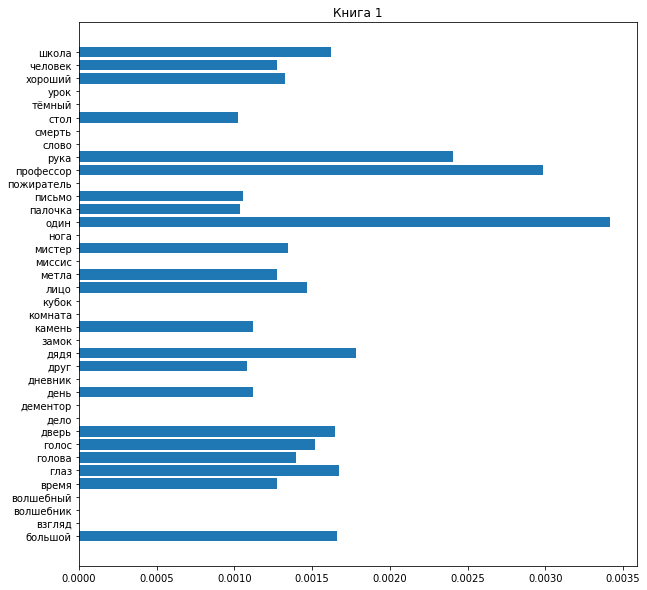

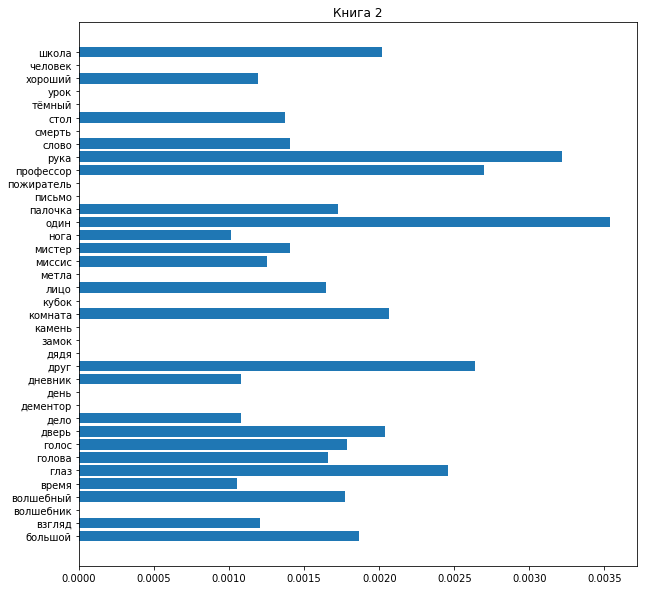

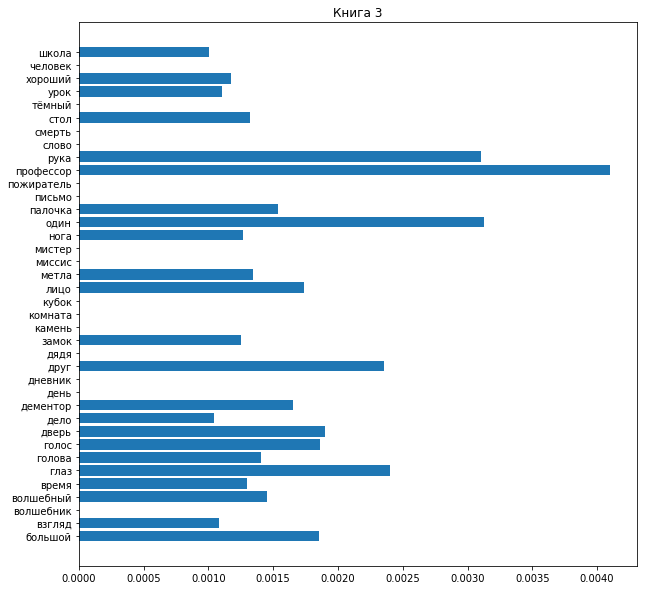

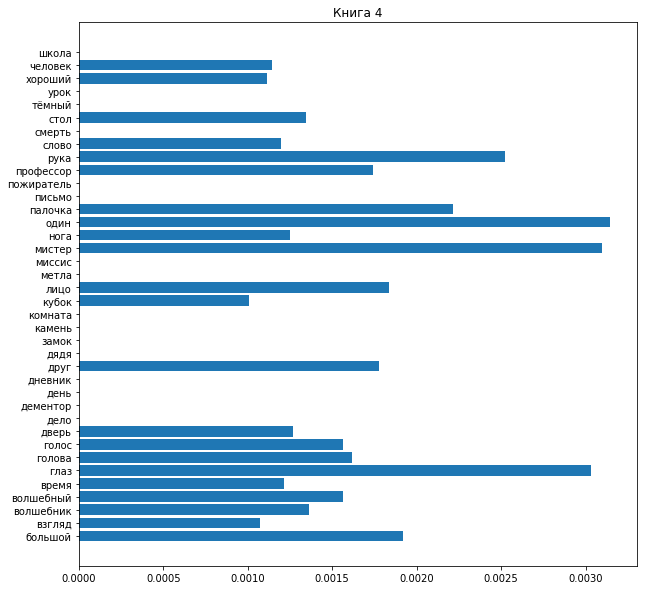

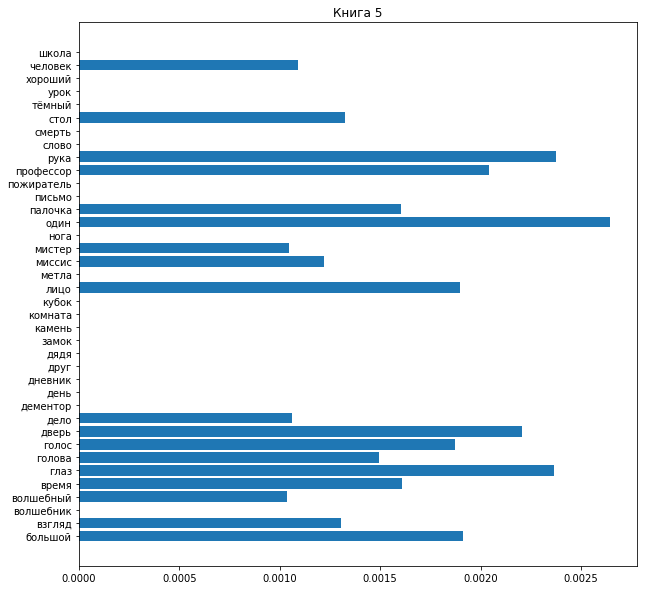

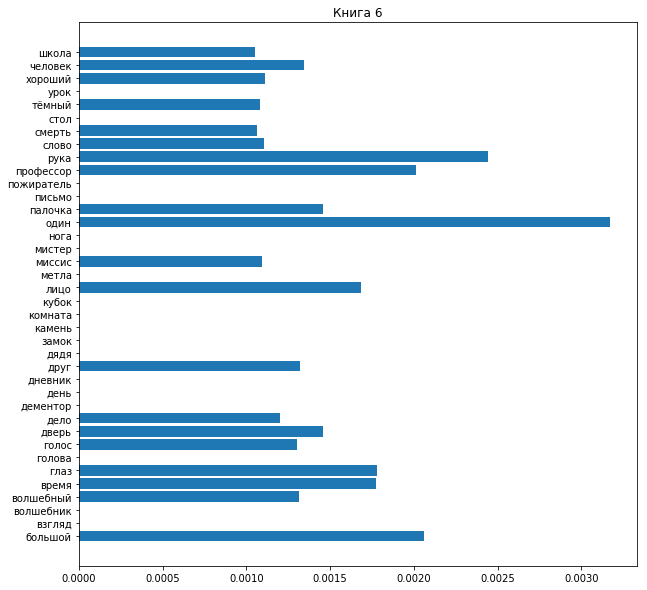

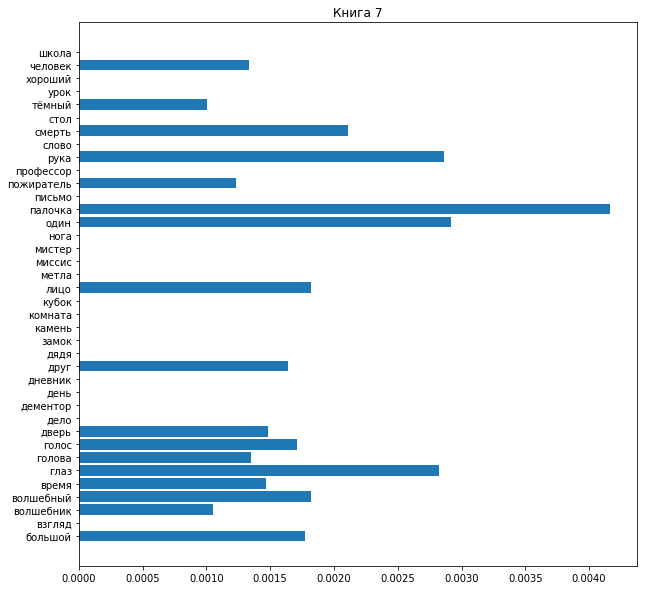

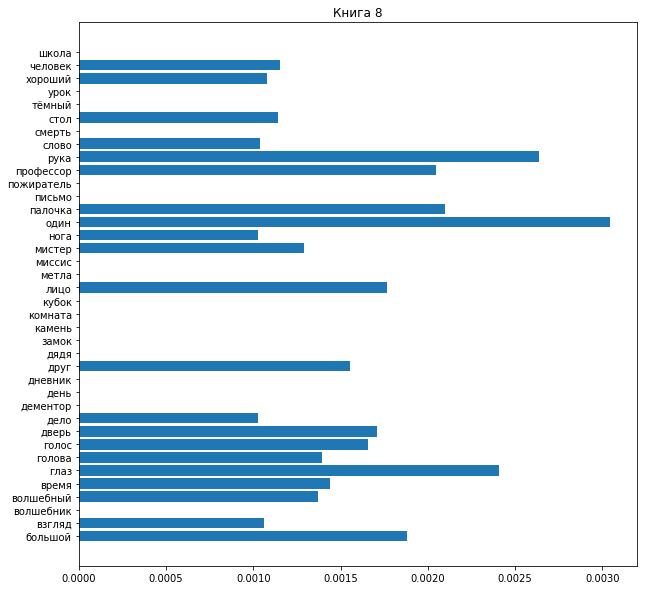

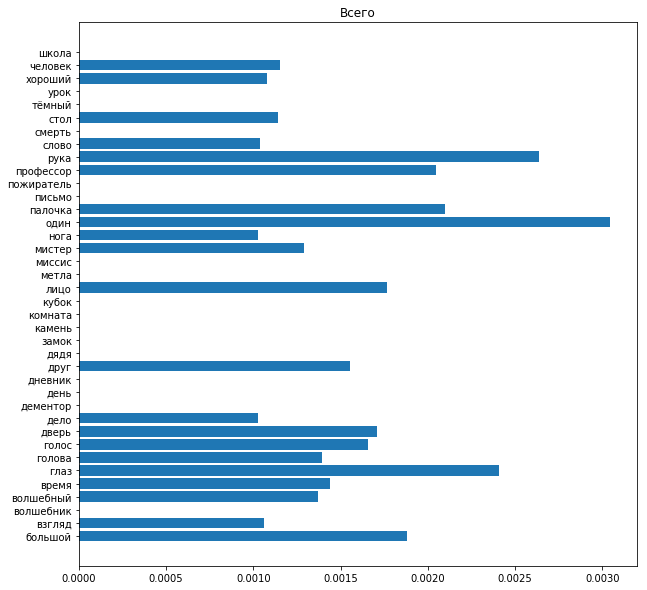

In [36]:
#предметы
for i in range(len(items)):
    plt.figure(figsize=(10,10))
    plt.barh(items.columns, items.iloc[i])
    plt.title('Книга ' + str(i + 1))
    plt.show()
plt.figure(figsize=(10,10))
plt.barh(items.columns, items.iloc[7])
plt.title('Всего')
plt.show()